# Assignment 2 - Differential Equations

Solving partial differential equations is crucial to a huge variety of physical problems encountered in science and engineering. There are many different numerical techniques available, all with their own advantages and disadvantages, and often specific problems are best solved with very specific algorithms.

You will have learnt about Euler and Runge-Kutta methods in 2nd year lectures, and you should have explored the class of problem that can be solved with numerical integration in exercises.  In this assignment, we will cover more complex classes of problem - described below.


## Initial value problems

In this class of problem, the state of a system is fully described by an ordinary differential equation together with an initial condition.  For example, the motion of a body under gravity, with initial conditions given by the position and momentum of the body at a particular point in time.  The soluiton (ie. position and momentum at an arbitrary time in the future) can then be found by integration.  You should have encountered the use of numerical integration in solving such problems in the 2nd year course.

## Boundary value problems

Boundary value problems differ in that the conditions are specified on a set of boundaries, rather than at just one extreme.  For example, the electric field between a pair of capacitor plates at fixed potential, as discussed in the problem below.

There are several numerical approaches for solving boundary value problems, for example :

### Shooting Method

In this method, the boundary value problem is reduced to an initial value problem, which is solved numerically for different parameter choices. A solution is found when a set of parameters give the desired boundary conditions.  For example, finding a rocket trajectory which joins two specified points in space.  The boundary conditions are the specified points, and the initial momentum is a parameter that may be varied until a solution is found.  (This should sound familiar!)

### Finite Difference Methods

In this class of method, the differential equation is evaluated at discrete points in space and time, and derivatives are approximated by finite differences.  The Euler and Runga-Kutta methods are simple examples.  These methods typically involve iteration on the set of finite values until a solution is found.

### Relaxation

This is a common technique used to solve time-independent boundary condition problems.  An initial guess at the solution is supplied, and then allow to "relax" by iterating towards the final solution.  Conceptually this is is the same as the time-dependent problem of letting the system reach equilibrium from some arbitrary initial state.

The steps for implementing a relaxation method are :
1. Define a (normally regular) spatial grid covering the region of interest including points (or “nodes”) on the boundaries
2. Impose the boundary conditions by fixing the nodes on the boundaries to the relevant values
3. Set all non-boundary nodes to an initial guess
4. Write down finite difference equations
5. Pick a convergence criterion
6. Iterate the equations at each node until the solution converges

Care must be taken to choose the form of the equations and iteration method to ensure stability and efficiency.

## Q1 - The Poisson Equation

Consider the example of the Poisson equation $(\nabla^2V = −\rho)$ in one dimension. The grid of nodes in this case can be taken as a series of $n$ equally spaced points $x_i$ with a spacing $\Delta x = h$. The Taylor expansion of $V$ around the point $x_i$ is :

$$ V(x) = V(x_i) + \delta x \frac{dV(x_i)}{dx} + \delta x^2 \frac{d^2V(x_i)}{dx^2} + ...$$

so adding the values at $\delta x = \pm h$ (i.e. at $x_n \pm 1$) gives :

$$ V(x_{i−1}) + V(x_{i+1}) = 2V(x_i) + h^2 \frac{d^2V(x_i)}{dx^2} $$

which can be rearranged to give Equation 1 :

$$ \frac{d^2V(x_i)}{dx^2} = \frac{V(x-{i−1}) + V(x_{i+1}) − 2V(x_i)}{h^2}  $$

This is the standard finite difference representation for the second derivative.

Generalising this equation to 2D in the Poisson equation, and rearranging, gives Equation 2, that can be used to iterate the value at each node:

$$ V(x_i,y_j)= \frac{1}{4} (V(x_{i−1},y_j)+V(x_{i+1},y_j)+V(x_i,y_{j−1})+V(x_i,y_{j+1}))+ \frac{\rho(x_i,y_j)h^2}{4} $$

In the absence of any sources ($\nabla^2 V=0$, i.e. the Laplace equation) each node is simply the average of its four closest neighbours.

This equation can be solved in a number of ways. One option is to calculate a new value for each node based on the previous values for each of the neighbour nodes, requiring two complete copies of the grid. This is called the Jacobi method. A second option is to update the values on the grid continually, so each node is updated using partially old and partially new values. This is the Gauss-Seidel method.

## 1a) 
Write a function to solve Laplace’s equation in two dimensions for the potential V. You should use the finite-difference representation above (with $\rho=0$) and iterate using either the Jacobi or Gauss-Seidel method. You will need to choose and apply a convergence condition e.g. no node value changes by more than X% between successive iterations.

In [49]:
import numpy as np
import copy
import matplotlib.pyplot as plt

def laplace(tol,v_new,vbefore): #Takes inputs for tolereance for the conversion condition and matix with boundary conditions 
    error = 1                      
    itera = 0
    while error > tol: # convergence condition
        itera += 1                                        #Sums the iteration
        for i in range(1,xdim-1,1):                       #Gauss-seidel method for iteration 
            for j in range(1,ydim-1,1):                 
                v_new[i,j] = 1/4*(v_new[i+1,j] + v_new[i-1,j] + v_new[i,j+1] + v_new[i,j-1] )
        error = np.amax(abs(v_new[1:xdim-1,1:ydim-1]-vbefore[1:xdim-1,1:ydim-1])) #Largest difference, excluding the boundary parts of the matrix
        vbefore=copy.deepcopy(v_new) #*Deepcopy used as it nessasary for an array otherwise it doesnt work 
    return v_new, itera

## Code discussion
This code uses the Gauss-seidel method to iterate the finte difference representaion of Laplace's equation. The boundary conditions are not iterated (but do effect values next to them) and are the in the edge columns and rows of the matrix. Because of this they are excluded from the error caluclution.
I needed to create a deepcopy of the changed array (v_new) as the '=' sign doesnt create a new copy in the memory, just changes the indicators of the array location. So the '=' will make the computer think that v_before and v_new are the same.
This function will return the final array from the specified tolerance and number of iterations required for that level of convergence. This function uses $max[v_{i}-v_{i-1}]$ as the convergence condition. So the tolerance is the greatest difference between the two array that we allow.

Verify your function by checking it works in a simple, known case. Compare the solution found with the analytical solution and quantify the differences. Use this to investigate the sensitivity of your solution to the choice of grid density and convergence condition.

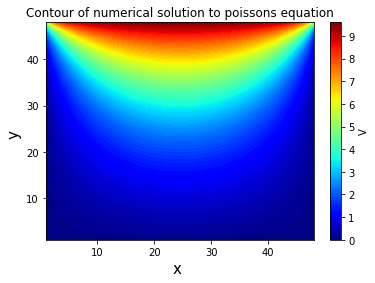

Number of iterations:  1140


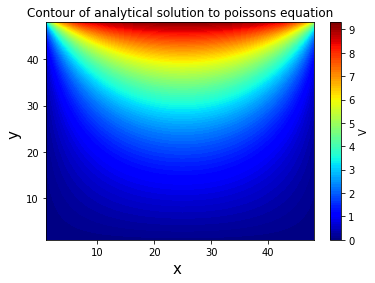

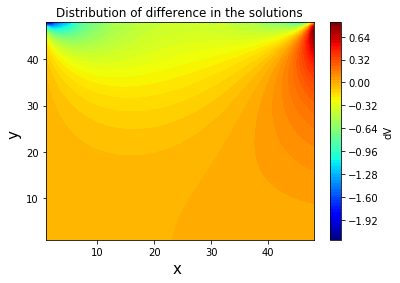

In [50]:
"""
Example of this program working, It is of a high potential plate at the top across a grid.
"""
xdim = 50  #Grid size
ydim = 50  #Grid size

V_guess = 1
tol = 0.0001

# boundary conditions
Vtop = 10
Vbottom = 0
Vright = 0
Vleft = 0
#creates the changing array
v_new = np.empty((xdim,ydim))
v_new.fill(V_guess)

#sets edges of array to boundary conditions
v_new[(xdim -1):,:] = Vtop      
v_new[:1, :] = Vbottom          
v_new[:, xdim-1] = Vright        
v_new[:, :1] = Vleft        

#copy of the intial array but no need for the boundarys
vbefore = np.zeros((xdim,ydim))
vbefore.fill(V_guess)

#plot of the results
sol = laplace(tol,v_new,vbefore)
X, Y = np.meshgrid(np.arange(1,xdim-1), np.arange(1,ydim-1)) 
colorinterpolation = 100
plt.contourf(X,Y,sol[0][1:xdim-1,1:ydim-1],colorinterpolation,cmap=plt.cm.jet) 
plt.title("Contour of numerical solution to poissons equation")
plt.xlabel('x ',fontsize = 15) 
plt.ylabel('y ',fontsize = 15)
plt.colorbar(label = 'V')
plt.show()

print('Number of iterations: ',sol[1])

"""
Example/test with an analytical solution
"""

u = 0
for n in range(1,20): #sums the equation 20 times
    u =u +((1-np.cos(n*np.pi))/(n*(np.exp(n*np.pi)-np.exp(-n*np.pi)))) * np.sin(n*np.pi*X/xdim)*(np.exp(n*np.pi*Y/ydim)-np.exp(-n*np.pi*Y/ydim))
U =  20/(np.pi)*u

colorinterpolation = 100
plt.contourf(X,Y,U,colorinterpolation,cmap=plt.cm.jet)
plt.title("Contour of analytical solution to poissons equation")
plt.xlabel('x ',fontsize = 15) 
plt.ylabel('y ',fontsize = 15)
plt.colorbar(label = 'V')
plt.show()

#difference between the two methods
pre = U-sol[0][1:xdim-1,1:ydim-1]
plt.contourf(X,Y,pre,colorinterpolation,cmap=plt.cm.jet)
plt.title("Distribution of difference in the solutions")
plt.xlabel('x ',fontsize = 15) 
plt.ylabel('y ',fontsize = 15)
plt.colorbar(label = 'dV')
plt.show()

## Code Discussion

This code creates the inital array of a specific size and then fills the array with the guess value of V. The boundary conditions are then added to the array. 
The analytical solution is is summed for $1<n<100$, this range is probaly unessasay as they highorder values are negleble. I decided to show the difference between the two solutions with a contour plot to show the distribution of error. 

## Analytical Solution 
The simple case I used was that of a Voltage applied to one boundary (Dirichlet), and the other boundaries set to 0. For this case it has general soultion of the form:
$$V(x,y) = \sum_{n=1}^{\infty}A_{n}sin(n \pi x)(e^{n \pi y}-e^{-n \pi y}), $$
$$A_{n} = \frac{2}{H sinh(n\pi)} \int_{0}^{H} f(y) sin(\frac{n \pi y}{H}), $$

Where $f(y)$ is the nonzero boundary condition, $H$ is the maximum y value.
For this simple case I took $f(y)$ = 10V (which is the same as puttting top boundary to this value). The solution then becomes:

$$V(x,y) = \frac{20}{\pi} \sum_{n=1}^{\infty} \frac{1-cos(n \pi)}{n(e^{n \pi}-e^{-n \pi})} sin(n \pi x)(e^{n \pi y}-e^{-n\pi y}) $$

## Discussion 

This solution to the Laplace equation is the solution to this specific Dirichlet problem, where the boundary is set to a specific value and the domian is allowed to reach a stationary state. The Numerical solution and the Analtyical solution are in very close argrement as shown above, Which shows the validity of The numerical solution. There are however some differences only seen when looking at the distribution of there difference, which is talked about later.

### Sensitivity to Changing Grid Size

As the Numerial solution depends alot n the size of the grid, its interesting to see how changing this can effect the solution.
 
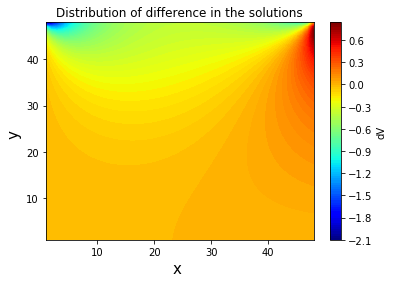FIG 1. Difference distribution in the solutions for (50 x 50) grid and tolerance = 0.0001.

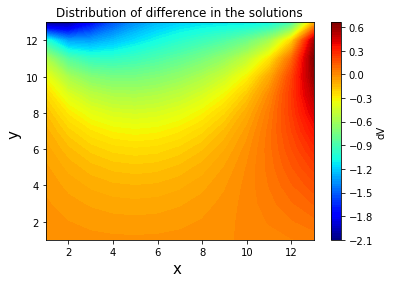FIG 2. Difference distribution in the solutions for (15 x 15) grid and tolerance = 0.0001.

Fig 1 and Fig 2 as shown above show how the numerical solutions are sensitive to the size of the grid, It can be sen that the areas of large difference become greater and the solutions become less similar. the value o this difference doesnt change so there must 

### Sensitivity to changing Tolereance

As mentioned before the tolerenace of this solution is greatest allowed value between to successive iterations. So how this value effects the solution is good to understand.

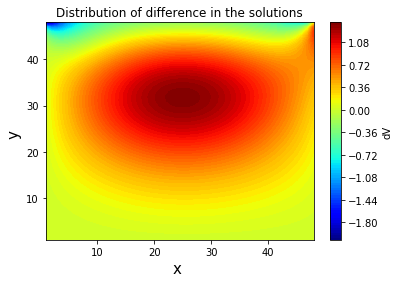 FIG 3. Difference distribution in the solutions for (50 x 50) grid and tolerance = 0.01.

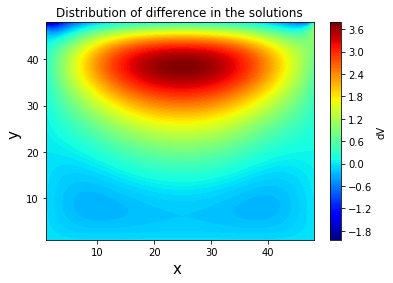 FIG 4. Difference distribution in the solutions for (50 x 50) grid and tolerance = 0.05.

We can compare Fig 1 and Fig 3 as they have the same grid size with different tolereance. It is noticeable that the centre of the Difference distribution is the largest, this represents the area of the solution that is still changing on repeated iterations. If we now look at Fig 4 it can be seen that the area that has large difference has moved closer to the boundary. This again shows that this area represents the area that is still changing on repeated iteration. So as the tolereance decreases this are should move down the distribution. we can say that the iteration has reached a satisfactory conversion when the whole area is very close to 0, which is shown in fig 1. 
In all the figures there are regions in the top corners of the solution which have the greatest difference from the analytical solution. This is because as this region of the figure is very sensitive to any differences in the two solutions and will disapear as the gridsize increases and the tolerance decreases. This is shown in Fig 5 as the difference is now smaller at both sides. This required alarge amount of computation and so greater decrese in tolereance and grid size is dificult. 

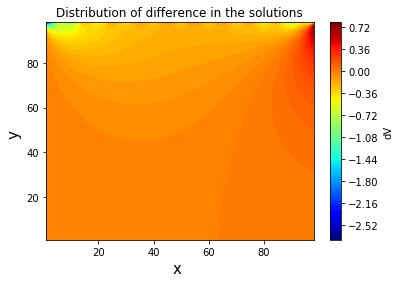 FIG 5. Difference distribution in the solutions for (100 x 100) grid and tolerance = 1E-5.

At the very top of Fig 5 very small lined up semicircles can be seen these are from the limited sum in the analytical solution. 


## 1b)
Now use your function to calculate the potential and electric field within and around a parallel plate capacitor comprising a pair of plates of length a, separation d. Demonstrate that the field configuration approaches the “infinite” plate solution (E = V/d between plates, E = 0 elsewhere) as the ratio of  becomes large.

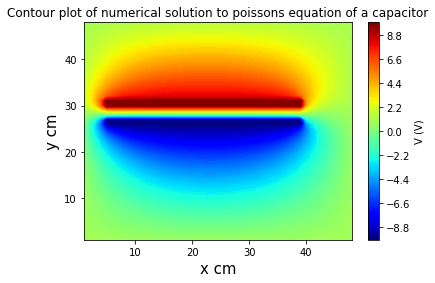

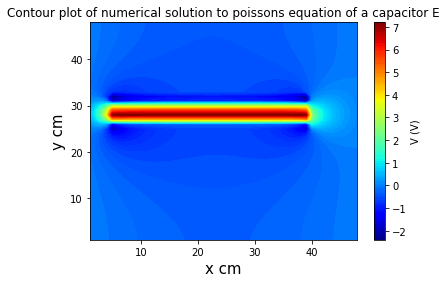

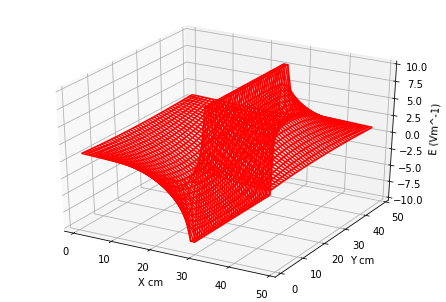

In [51]:
from mpl_toolkits.mplot3d import Axes3D

def laplace_C(tol,v_new,vbefore):
    error = 1
    itera = 0
    while error > tol:
        itera += 1                                        #Sums the iteration
        for i in range(1,xdim-1,1):                       #Gauss-seidel method for iteration 
            for j in range(1,ydim-1,1):                   #
                v_new[i,j] = 1/4*(v_new[i+1,j] + v_new[i-1,j] + v_new[i,j+1] + v_new[i,j-1] )
        v_new[30:32,5:40] = V         # to insure capacitor remain at V
        v_new[26:28,5:40] = -V        # 
        error = np.amax(abs(v_new[1:xdim-1,1:ydim-1]-vbefore[1:xdim-1,1:ydim-1]))
        vbefore=copy.deepcopy(v_new)                      #Deepcopy used as it nessasary for an array 
    return v_new, itera

xdim = 50
ydim = 50

V_guess = 1
V = 10
# boundary conditions
Vtop = V
Vbottom = -V
Vright = 0
Vleft = 0

v_new = np.empty((xdim,ydim))
v_new.fill(V_guess)

v_new[30:32, 10:40] = Vtop          #creates the capacitors in the array
v_new[26:28, 10:40] = Vbottom       #

vbefore = np.zeros((xdim,ydim))
vbefore.fill(V_guess)
tol = 0.0001

sol = laplace_C(tol,v_new,vbefore)

X, Y = np.meshgrid(np.arange(1,xdim-1), np.arange(1,ydim-1))
colorinterpolation = 100
plt.contourf(X,Y,sol[0][1:xdim-1,1:ydim-1],colorinterpolation,cmap=plt.cm.jet) 
plt.title("Contour plot of numerical solution to poissons equation of a capacitor")
plt.xlabel('x cm',fontsize = 15) 
plt.ylabel('y cm',fontsize = 15)
plt.colorbar(label = 'V (V)')
plt.show()

"""Finding the scalar Field E"""

v = sol[0][1:xdim-1,1:ydim-1]
E = np.gradient(v,axis=0)
plt.contourf(X,Y,E,colorinterpolation,cmap=plt.cm.jet) 
plt.title("Contour plot of numerical solution to poissons equation of a capacitor E")
plt.xlabel('x cm',fontsize = 15) 
plt.ylabel('y cm',fontsize = 15)
plt.colorbar(label = 'V (V)')
plt.show()
"""
in 3D plot:
"""
def functz(V):
    z = V[X,Y]
    return z

Z = functz(sol[0])
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z,color = 'r')
ax.set_xlabel('X cm')
ax.set_ylabel('Y cm')
ax.set_zlabel('E (Vm^-1)')
plt.show()



## Code Discussion

To add the capacitor plates to the grid I needed to reset the values after every iteration so that any changes can be undone. This required modifying the previous Poisson funciton. This code also produces a 3d plot of the potential. I did this using matplotlibs 3d ploting function where the z axis is the potential, It shows in a better way the gradient between the plates.

## Discussion
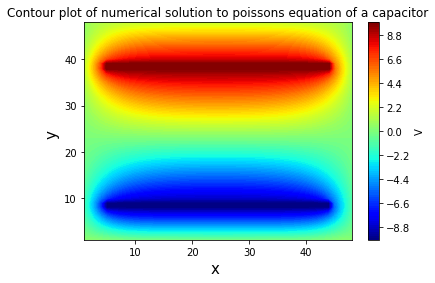 FIG 6. potential around a capacitor with d = 20 cm and a = 30cm.

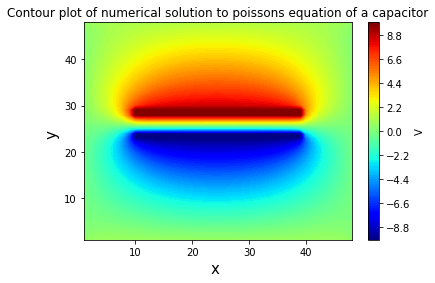   FIG 7. potential around a capacitor with d = 2 cm and a = 30cm.

The above figures show how the field around a capacitor change as the ration of a/d increases. For Fig 6 with a small ratio we see that the at the potential is npt constent across the planes of the plates. This is in contrast to Fig 7 where the ratio is larger and the potential across the plane of the plates is constant. Hence as ratio becomes larger it tends to the infinite plane solution. This is shown in the Figure below.

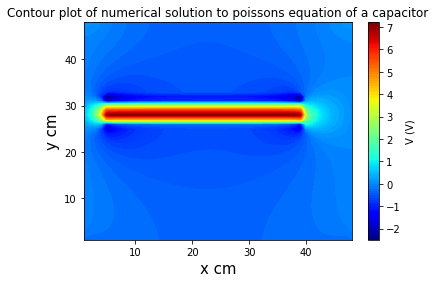 FIG 7.2. E around a capacitor with d = 2 cm and a = 30cm.

# Q2 - The Diffusion Equation

Solving the diffusion equation 

$$\alpha \nabla^2 \phi = \frac{\partial \phi}{\partial t}$$

is mathematically similar to solving the Poisson equation. The technique will be to start from known initial conditions and use finite difference equations to propagate the node values forwards in time (subject to any boundary conditions).

A first try using Equation 1 above gives the finite difference form:

$$\frac{\phi′(x_i) − \phi(x_i)}{\delta t} = \frac{\alpha}{h^2} [\phi (x_{i−1}) + \phi(x_{i+1}) − 2\phi(x_i)]$$

Here the values, $\phi$, at three neighbouring points at a time t are used to evaluate the value $\phi`$ at the next time step, $t + \delta t$. This is known as a forward-time or explicit method. Unfortunately, this methood is known to be unstable for certain choices of $h$ and $\delta t$.

A stable alternative is obtained by using the equivalent backward-time or implicit equation:

$$\frac{\phi'(x_i) - \phi(x_i)}{\delta t} = \frac{\alpha}{h^2} [\phi'(x_{i-1}) + \phi'(x_{i+1}) -  2\phi'(x_i)] $$

Now the spatial derivative on the right-hand side needs to be evaluated at $t + \delta t$, which may appear problematic as the $\phi(x)$ values are known while the updated $\phi′(x)$ values are not. Fortunately Equation 3 can be written explicitly in matrix form and solved using the methods explored in Assignment 1.


## 2a)
An iron poker of length 50 cm is initially at a temperature of 20 C. At time t = 0, one end is thrust into a furnace at 1000 C and the other end is held in an ice bath at 0 C. Ignoring heat losses along the length of the poker, calculate the temperature distribution along it as a function of time. You may take the thermal conductivity of iron to be a constant 59 W/m/K, its specific heat as 450 J/kg/K and its density as 7,900 kg/m3.

Your solution should apply the implicit finite difference method above. It is also recommended that you use an appropriate linear algebra routine from numpy/scipy. You should find ways to verify your results, and quantify the uncertainties due to the method. Discuss your results in the text box below.

In [52]:

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import Tk, Canvas
from matplotlib.figure import Figure 


def diffusion(A,T,dt):
    t = 0
    Z = []
    while t < t_final:
        t = t + dt
        z = np.matmul(np.linalg.inv(A),T)
        Z.append(z)
        T = copy.deepcopy(z)
    return Z

print("please wait while the figure is Created")
L = 0.5
n = 100
T0 = 30 + 275.25
Tf = 1000 + 275.25
Ti = 0 + 275.25
dx = L/n
rho = 7900  #kg/m3
cp = 450    #j/kg/k
k = 59
alpha = (59/(450*7900))
    
t_final = 5000  #s
dt = 5
    
C = alpha*dt/(dx**2)
    
x = np.linspace(dx/2,L-dx/2,n)

# initial temperature distribution
T = np.ones(n)*T0
T[0] = Ti
T[n-1] = Tf

#sets the matirx A as shown below
A = np.zeros((len(x),len(x)))
for i in range(1, len(x)-1):      
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1+2*C
A[0,0] = A[len(x)-1,len(x)-1] = 1
A[len(x)-2,0] = 0

    
""" This code plots the graph in a tkinter window """

class plot:
    def __init__(self,master):
        self.master = master
        master.title("Oribit simulation Main Menu")
        figure = Figure(figsize=(6,5), dpi = 100)
        a = figure.add_subplot(111)
        Z = diffusion(A,T,dt)
        a.plot(x,Z[0],label='time: 0 s',linewidth=3.0)
        for n in range(1,len(Z)-2):
            a.plot(x,Z[n],'c',linewidth=0.8)
        q = len(Z)
        a.plot(x,Z[q-1],label='time: 5000 s',linewidth=3.3)
        a.legend(loc=1) 
        a.set_xlabel(" Distance (m) ")
        a.set_ylabel(" Temperature (K) ")
        canvas = FigureCanvasTkAgg(figure, master=self.master)
        canvas.get_tk_widget().pack()  
root = Tk()                      
one = plot(root)                 
root.mainloop()


please wait while the figure is Created


## Code Discussion

To solve this problem I used a similar structure as i did for part 1. I put the iteration speperate from the main code in a funciton and then specified the boundary condition. For this program its important to have the array values that corespond to the boundary conditions to be 1 if diagonal and 0 for the other values in the row. This was done for A[0,0] and A[len(x)-1,len(x)-1]. this was to make the array of the form:
$$\left(\begin{array}{ccccccc} 1& 0& 0& \vdots & 0& 0& 0\\ \\\cdots & 0 & -C & 1+2C & -C & 0 & \cdots\\ \\ 0& 0& 0& \vdots &0 &0 &1 \end{array}\right)$$

To create the GUI I wanted to create a small class to make the code for this tidy and seperate from the code that cretes the solution. The plot is made of a line for the distribution at different times, separated by dt. With the first and last plot highlighed.


The Matrix from the backward time equation above gives:
$$
\left(\begin{array}{c} \vdots \\ \phi_i \\ \vdots \end{array}\right) = 
\left(\begin{array}{ccccccc} & & & \vdots & & & \\ \cdots & 0 & -C & 1+2C & -C & 0 & \cdots \\ & & & \vdots & & & \end{array}\right)
\left(\begin{array}{c} \vdots \\ \phi_i' \\ \vdots \end{array}\right),
$$

Where $c = \frac{\alpha dt}{dx^{2}} $ and $\alpha = \frac{k}{\rho c_{p} }$. This can be solved for $\phi_{i}'$ by taking the inverse of the matrix and multipling with $\phi_{i}$, which is known.
## Discussion

We see the temperature distribution along a 1D rod as a funciton of time. It can be seen from the figure that as time increase the solution approaches a linear function as the which is expected as this is a steady state solution. Increasing the time beyond this will not change the solution. 



## 2b)
Now repeat the calculation, but assume the far end of the poker from the furnace is no longer held at 0 C, and experiences no heat loss. You will need to modify your code to achieve this, and you should discuss the motivation for your changes below.

In [53]:
t_final = 10000  #s
dt = 5
T = np.ones(n)*T0
T[n-1] = Tf
A = np.zeros((len(x),len(x)))

for i in range(1, len(x)-1):
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1+2*C
A[len(x)-1,len(x)-1] = A[0,0] = 1
A[0,0] = 1+2*C
A[0,1] = -2*C

print("please wait while the figure is Created")

"""Tkinter window of the plot"""

class plot2:
    def __init__(self,master):
        self.master = master
        master.title("Oribit simulation Main Menu")
        figure = Figure(figsize=(6,5), dpi = 100)
        a = figure.add_subplot(111)
        Z = diffusion(A,T,dt)
        
        a.plot(x,Z[0],label='time: 0 s',linewidth=3.0)
        for n in range(1,len(Z)-2):  #creates a plot for each time step
            a.plot(x,Z[n],'c',linewidth=0.8)
        q = len(Z)
        a.plot(x,Z[q-1],label='time: 5000 s',linewidth=3.3)
        a.legend(loc=1) 
        a.set_xlabel(" Distance (m) ")
        a.set_ylabel(" Temperature (K) ")
        canvas = FigureCanvasTkAgg(figure, master=self.master)
        canvas.get_tk_widget().pack()  
root = Tk()                      
one = plot2(root)                 
root.mainloop()


please wait while the figure is Created


## Code Discussion
There are only a few difference that are nesesary to allow the only source to be from the 1000 degree furnace, the first is simple and is to change the boundary value to the guess value. the other is to change the matrix to the one below. As the boundary needs to beallowed to change then the corresponding part of the matix must allow for that. Also notice the need for the -2C, this is nessasary to insure that there is no heat loss.

$$\left(\begin{array}{ccccccc} 1+2C& -2C& 0& \vdots & 0& 0& 0\\ \\\cdots & 0 & -C & 1+2C & -C & 0 & \cdots\\ \\ 0& 0& 0& \vdots &0 &0 &1 \end{array}\right)$$

## Discussion

For a sample that is exposed to a heat source and totally insulated we exect to see the sample reach thermal equalibrium with the sample after sufficient amount to time. This change in temperature will not be uniform and will effect the furthest part of the sample the last. 
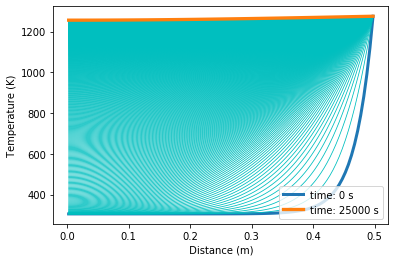
                    FIG 8. Temperature distribution at different t.

# Extensions

There are many possible extensions to this assignment, for example :
* Model the field in more complex arrangements than the parallel plate capacitor in 1b).
* Model a point charge using the code from Q1? What are the problems/challenges in doing so ?
* Demonstrate that the explicit method in Q2 is unstable for some choices of $\delta t$ and $h$.
* Implement higher-order methods (eg. Crank-Nicolson which includes a 2nd order difference for the spaital derivative).

You are advised to discuss any extensions with your demonstrator or the unit director.  If you wish to include any extensions, please do so *below* this cell.

## Crank-Nicholson Method

Crank-Nicholson Method is a second order difference method for the spactial derivative of a partial differencial equation. In this case the diffusion equation from Q2 (The boundary values that are mentioned in Q2 a). The Crank-Nicholson finite difference from is: 

$$\frac{\phi'(x_i) - \phi(x_i)}{\delta t} = \frac{\alpha}{2h^2} [\phi'(x_{i-1}) + \phi'(x_{i+1}) -  2\phi'(x_i) + \phi(x_{i-1}) + \phi(x_{i+1}) -  2\phi(x_i)] $$

It can be seen that this is a combination of both Forward Euler and Backwards Euler methods, as shown above. This can be easily transformed into matrix form and solved for $\phi'(x_{i})$ using the same linear algerbra routines that where used in Q2. 

The Matrix form is as $A\phi' = B\phi$:
$$
\left(\begin{array}{c} \phi'(x_{i-1}) \\ \phi'(x_i) \\ \phi'(x_{i+1}) \end{array}\right)\left(\begin{array}{ccccccc} & & & \vdots & & & \\ \cdots & 0 & -C & 1+2C & -C & 0 & \cdots \\ & & & \vdots & & & \end{array}\right) = 
\left(\begin{array}{ccccccc} & & & \vdots & & & \\ \cdots & 0 & C & 1-2C & C & 0 & \cdots \\ & & & \vdots & & & \end{array}\right)
\left(\begin{array}{c} \phi(x_{i-1}) \\ \phi(x_i) \\ \phi(x_{i+1}) \end{array}\right),
$$

So we then want to calculate $\phi'= A^{-1}B\phi$. Note that $C = \frac{\alpha dt}{2dx^{2}} $.



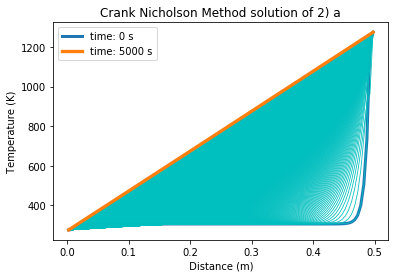

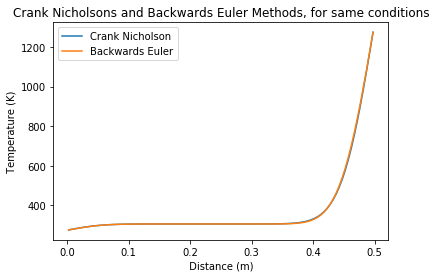

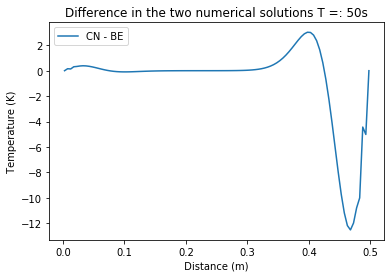

In [56]:
def CrankNicholson(t_final,A,B,T):
    t = 0
    Z = []
    while t < t_final:
        t = t + dt     
        u = np.matmul(np.linalg.inv(A),B)
        z = np.matmul(u,T)
        Z.append(z)
        T = copy.deepcopy(z)
    return Z
dt = 5
C = alpha*dt/(2*dx**2)
Tf = 1000 + 275.25
"""Creating Matrix A"""
A = np.zeros((len(x),len(x)))
for i in range(1, len(x)-1):
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1+2*C
A[len(x)-1,len(x)-1] = A[0,0] = 1

"""Creating Matrix B"""
B = np.zeros((len(x),len(x)))
for i in range(1, len(x)-1):
    B[i,i-1] = C
    B[i,i+1] = C
    B[i,i] = 1-2*C
B[len(x)-1,len(x)-1] = B[0,0] = 1

"""Initial Temp distribution"""
T = np.ones(len(x))*T0        
T[0] = Ti
T[len(x)-1] = Tf

Z = CrankNicholson(t_final,A,B,T)
plt.plot(x,Z[0],label='time: 0 s',linewidth=3.0)
for n in range(0,len(Z)-2):
    plt.plot(x,Z[n],'c',linewidth=0.8)
q = len(Z)
plt.plot(x,Z[q-1],label='time: 5000 s',linewidth=3.3)
plt.title('Crank Nicholson Method solution of 2) a')
plt.xlabel(" Distance (m) ")
plt.ylabel(" Temperature (K) ")
plt.legend()
plt.show()

"""Difference in The two methods used"""
#sets the matirx A as 
C = alpha*dt/(dx**2)
A = np.zeros((len(x),len(x)))
for i in range(1, len(x)-1):      
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1+2*C
A[0,0] = A[len(x)-1,len(x)-1] = 1
A[len(x)-2,0] = 0

b = 10   #the time step I want
diff = diffusion(A,T,dt) #recalling the function from Q2a
plt.plot(x,diff[b],label ='Crank Nicholson')
plt.plot(x,Z[b], label ='Backwards Euler')
plt.title('Crank Nicholsons and Backwards Euler Methods, for same conditions')
plt.xlabel(" Distance (m) ")
plt.ylabel(" Temperature (K) ")
plt.legend()
plt.show()

difference = diff[b] - Z[b]
plt.plot(x,difference,label ='CN - BE')
f = b*dt
string = 'Difference in the two numerical solutions T =: '+str(f)+'s'
plt.title(string)
plt.xlabel(" Distance (m) ")
plt.ylabel(" Temperature (K) ")
plt.legend()
plt.show()

### Discussion

This Code shows how to implement the second order Crank-Nicholson method of numerical integration and compares it to the Backwards Euler method of integration. The difference in these methods is shown above and it shows how the methods give slightly different solutions
We can see that the difference in the two solutions is made more appparent at earlier T due to the strong Gradient. The Crank-Nicholson mehtods has a error at a specific time of $O(\delta x^{2} )$ , where the backwards Euler method has error at a specific time as $O(\delta x)$. This is reason we see the slight differences in the two methods. The distribution of the difference shown in FIG E2, is around the regions of greatest change so towards the two boundaries. 
In Fig E4 this has changed and the middle section of the sample as this becomes a steadt state solution. 

 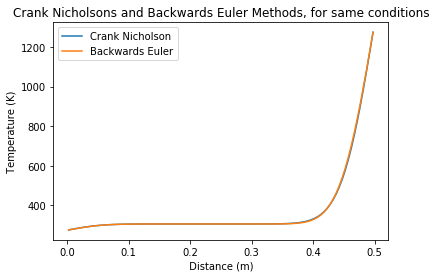Fig E1, This shows Crank-Nicholson and backwards Euler methods applied to solve the diffusion equation, with the same parameters T = 50s.
 
 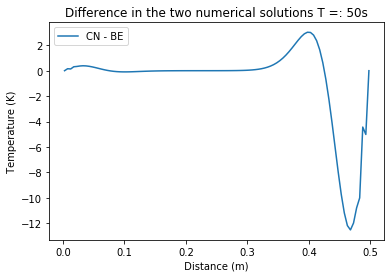Fig E2, This shows the difference in Crank-Nicholson and backwards Euler methods applied to solve the diffusion equation, with the same parameters T = 50s.

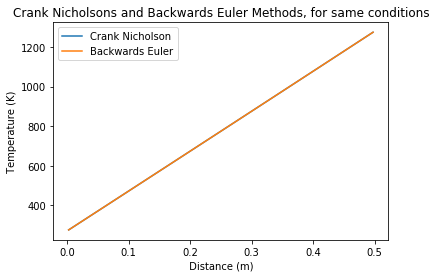
Fig E3, This shows Crank-Nicholson and backwards Euler methods applied to solve the diffusion equation, with the same parameters T = 4995s.
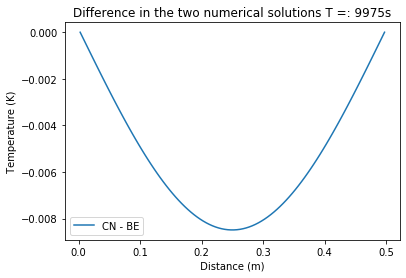
Fig E4 This shows the diffrence in Crank-Nicholson and backwards Euler methods applied to solve the diffusion equation, with the same parameters T = 4995s.